In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
data = pd.read_csv("house_prices_large_dataset.csv")
data.head()


,House_ID,Location,Area_sqft,Bedrooms,Bathrooms,Garage,Year_Built,Price_USD,Property_Type,Floor,Distance_to_CityCenter_km
0,1,Seattle,8077,3,4,3,2000,2973292,Bungalow,NaN,9.56
1,2,Houston,4211,1,2,0,1953,861522,Bungalow,NaN,21.84
2,3,Miami,3460,7,1,0,2007,1096391,Apartment,22.0,21.64
3,4,Seattle,5330,4,5,2,1973,1755822,Bungalow,NaN,45.83
4,5,Chicago,5958,2,3,3,1958,1491114,Townhouse,NaN,32.08


In [3]:
data.isnull().sum()

House_ID                         0
Location                         0
Area_sqft                        0
Bedrooms                         0
Bathrooms                        0
Garage                           0
Year_Built                       0
Price_USD                        0
Property_Type                    0
Floor                        37467
Distance_to_CityCenter_km        0
dtype: int64

In [4]:
data.describe()

,House_ID,Area_sqft,Bedrooms,Bathrooms,Garage,Year_Built,Price_USD,Floor,Distance_to_CityCenter_km
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,12533.00000,50000.000000
mean,25000.500000,5251.347080,4.009920,2.992200,1.498160,1986.534860,1.740653e+06,24.95819,25.284212
std,14433.901067,2747.746533,2.000255,1.413513,1.116433,21.348272,1.043823e+06,14.14481,14.295839
min,1.000000,500.000000,1.000000,1.000000,0.000000,1950.000000,8.144100e+04,1.00000,0.500000
25%,12500.750000,2856.000000,2.000000,2.000000,1.000000,1968.000000,8.763432e+05,13.00000,12.880000
50%,25000.500000,5253.000000,4.000000,3.000000,1.000000,1987.000000,1.616558e+06,25.00000,25.340000
75%,37500.250000,7641.000000,6.000000,4.000000,2.000000,2005.000000,2.465596e+06,37.00000,37.700000
max,50000.000000,9999.000000,7.000000,5.000000,3.000000,2023.000000,5.381279e+06,49.00000,50.000000


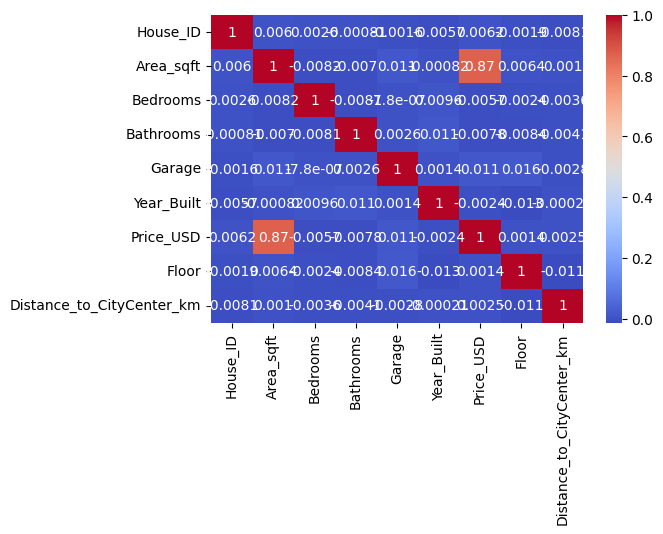

In [5]:
numeric_data = data.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(6,4))
sns.heatmap(numeric_data.corr(), annot=True,cmap='coolwarm')
plt.show()


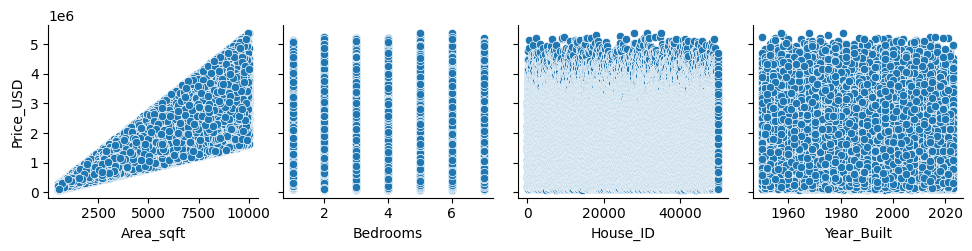

In [8]:
sns.pairplot(data, x_vars=["Area_sqft","Bedrooms","House_ID","Year_Built"], y_vars="Price_USD")
plt.show()


In [9]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

numeric_data.corr()


,House_ID,Area_sqft,Bedrooms,Bathrooms,Garage,Year_Built,Price_USD,Floor,Distance_to_CityCenter_km
House_ID,1.000000,0.005957,2.619338e-03,-0.000808,-1.601757e-03,-0.005709,0.006235,-0.001882,-0.008090
Area_sqft,0.005957,1.000000,-8.183076e-03,-0.006982,1.073074e-02,-0.000820,0.873149,0.006385,0.001010
Bedrooms,0.002619,-0.008183,1.000000e+00,-0.008108,-7.824082e-07,0.009568,-0.005691,-0.002423,-0.003581
Bathrooms,-0.000808,-0.006982,-8.107515e-03,1.000000,2.576358e-03,0.011011,-0.007783,-0.008422,-0.004053
Garage,-0.001602,0.010731,-7.824082e-07,0.002576,1.000000e+00,0.001351,0.011108,0.016437,-0.002807
Year_Built,-0.005709,-0.000820,9.568226e-03,0.011011,1.350798e-03,1.000000,-0.002381,-0.013012,-0.000211
Price_USD,0.006235,0.873149,-5.691360e-03,-0.007783,1.110764e-02,-0.002381,1.000000,0.001378,0.002522
Floor,-0.001882,0.006385,-2.422897e-03,-0.008422,1.643725e-02,-0.013012,0.001378,1.000000,-0.010968
Distance_to_CityCenter_km,-0.008090,0.001010,-3.581145e-03,-0.004053,-2.806936e-03,-0.000211,0.002522,-0.010968,1.000000


In [12]:
X = data[["Area_sqft","Bedrooms","Distance_to_CityCenter_km","Year_Built"]]
y = data["Price_USD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
y_pred = model.predict(X_test)

In [15]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)


RMSE: 506240.5642303164
MAE: 367425.6429365745
R2 Score: 0.7593681546351694


In [16]:
coeff = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
coeff


,Feature,Coefficient
0,Area_sqft,332.605097
1,Bedrooms,1029.058186
2,Distance_to_CityCenter_km,222.042123
3,Year_Built,-69.893227


###### Feature------------>Meaning
###### Area_sqft---------->Increase in price per extra sq.ft
###### Bedrooms----------->Price increase per additional bedroom
###### Distance to city--->Increase in price as the distance between the house and city gets closure
###### Year Built--------->price decrease as property becomes older 

### Part B - Buyer Segmentation (KNN Classification)

In [17]:
cust = pd.read_excel("customer.xlsx")
cust.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [18]:
cust = cust[cust['Customer ID'].notnull()]
cust = cust[cust['Quantity'] > 0]
cust = cust[cust['Price'] > 0]


In [19]:
cust['TotalPrice'] = cust['Quantity'] * cust['Price']


In [20]:
customer = cust.groupby('Customer ID').agg({
    'TotalPrice': 'sum',      # Budget
    'Invoice': 'nunique',     # Frequency
    'Country': 'first'       # Preferred location
}).reset_index()

customer.rename(columns={
    'TotalPrice': 'budget',
    'Invoice': 'frequency',
    'Country': 'location'
}, inplace=True)


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
customer['location'] = le.fit_transform(customer['location'])


In [22]:
customer['segment'] = pd.qcut(customer['budget'], 3, labels=[0,1,2])


In [23]:
X = customer[['budget', 'frequency', 'location']]
y = customer['segment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'euclidean'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [26]:
knn.score(X_test, y_test)


0.9745075318655851

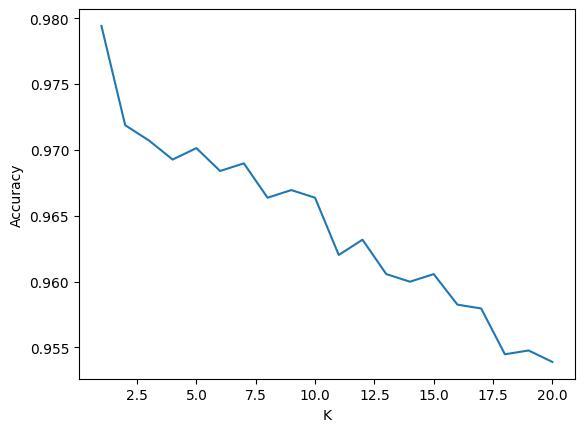

In [27]:
from sklearn.model_selection import cross_val_score

k_values = range(1,21)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(score.mean())

plt.plot(k_values, scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()


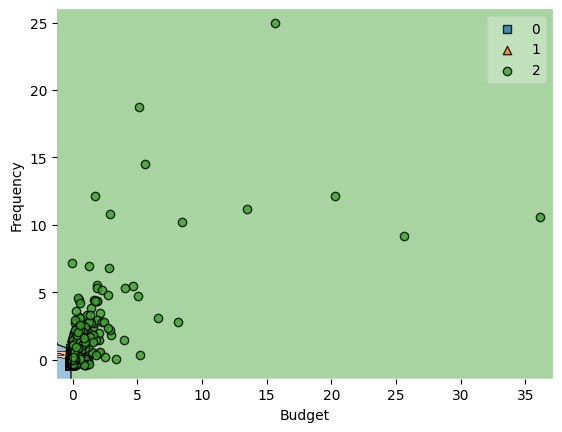

In [34]:
from mlxtend.plotting import plot_decision_regions

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[:,0:2], y_train)

plot_decision_regions(X_train[:,0:2], y_train.cat.codes.to_numpy(), clf=knn)

plt.xlabel("Budget")
plt.ylabel("Frequency")
plt.show()
